In [1]:
load("9_19.Rdata")

In [5]:
library(dplyr)
DGV_Information$ethnicity_New%>%unique

[1] "European (Non-Finnish)" "European (Finnish)"     "East Asian"            
[4] "Latino"                 "South Asian"            "African"               
[7] "No-report"              "Other"                  "Ashkenazi Jewish"

In [4]:
#test 用完删
library(dplyr)
sample_id<-DGV_Information[DGV_Information$ethnicity_New=='European (Non-Finnish)',"external sample id"]%>%unique%>%unlist
gene_id<-NULL
count<-0

for(i in sample_id)
{
i<-paste("^",i,"$|,",i,",|^",i,",|,",i,"$",sep="")
gene_id<-c(gene_id,DGV_Variants[grep(i,DGV_Variants$samples),"genes"]%>%unlist%>%strsplit(",")%>%unlist%>%unique%>%list)
count=count+1
#print(count)
}
#
names(gene_id)=sample_id

Matrix_01<-matrix(0,nrow=gene_id%>%unlist%>%unique%>%length,ncol=length(gene_id))
rownames(Matrix_01)<-gene_id%>%unlist%>%unique
colnames(Matrix_01)<-sample_id
for(i in sample_id)
{
Matrix_01[gene_id[[i]],i]="1"
}
write.table(Matrix_01,file = "European (Non-Finnish).txt",quote = FALSE,sep = "\t")


Loading required package: cowplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cowplot’”

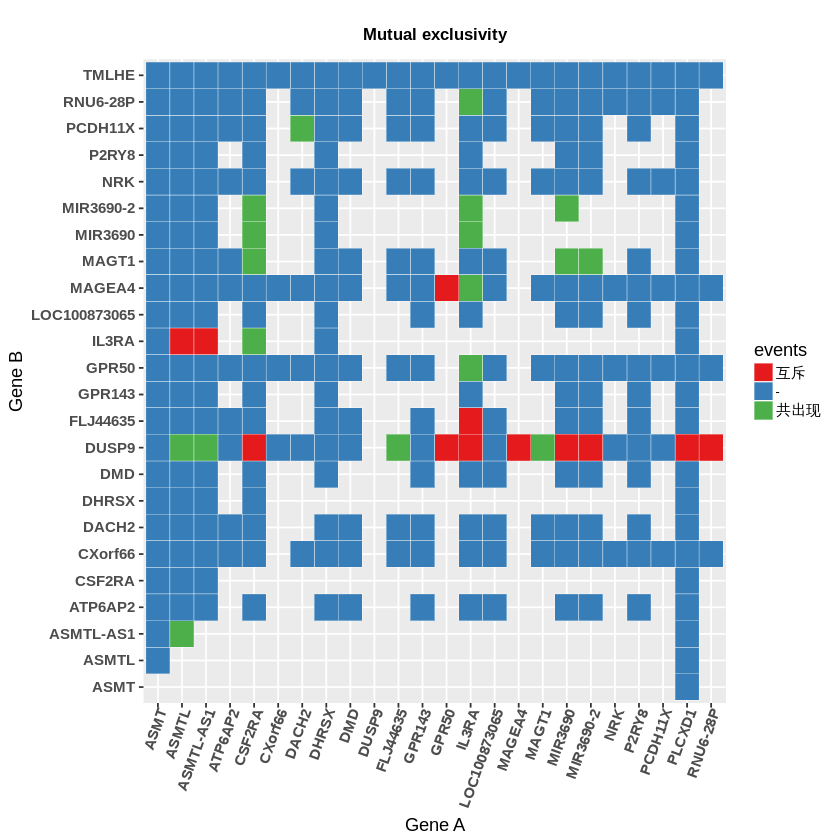

In [26]:
E<-apply(Non_Finnish_Matrix_chrX,1,as.numeric)
E<-Non_Finnish_Matrix_chrX[apply(E,2,sum)[apply(E,2,sum)>20]%>%names,]%>%t
temp<-t(E)
temp<-apply(E,2,as.numeric)
temp<-temp[apply(temp,1,sum)>2,]
E<-temp

#E<-E[,1:20]
g<-colnames(E)
#s <- intersect(colnames(E),as.character(specific.gene.list[[2]]))
  resu <- NULL
  for(i in 1:length(g)){
    for(j in i:length(g)){
      if(i!=j){
        f <- fisher.test(E[,i],E[,j])
        resu <- rbind(resu,cbind(geneA=colnames(E)[i],geneB=colnames(E)[j],oddsRatio=f$estimate,pvalue=f$p.value))
      }
    }
  }
  # some formatting
  res.new <- as.data.frame(resu)
  #res.new$geneA <- factor(res.new$geneA,levels=colnames(E))
  #res.new$geneB <- factor(res.new$geneB,levels=colnames(E))
  res.new$oddsRatio <- as.numeric(as.character(res.new$oddsRatio))
  res.new$pvalue <- as.numeric(as.character(res.new$pvalue))
  row.names(res.new) <- NULL
  # use p.adjust to correct for multi testing using a FDR
  res2 <- cbind(res.new,fdr=p.adjust(res.new$pvalue,"fdr"))
  #res2<-res2[res2$oddsRatio>10,]
  # change the FDR in labels for plotting
   # res2$stars <- cut(res2$fdr, 
   #                  breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), 
   #                 label=c("***", "**", "*", ""))

  
   
   res2$events <- cut(res2$oddsRatio,
                      breaks=c(0, 0.1,  10, Inf), 
                      label=c("互斥", "-","共出现"),
                      include.lowest = T)
   

   
   
   
   
  # plot with ggplot 2
  require(ggplot2)
  require(cowplot) # not necessary but the plot is nicer
  p <- ggplot(res2, aes(geneA, geneB)) + 
    geom_tile(aes(fill = events),colour = "white") + 
   # geom_text(aes(label=stars), color="black", size=1) + 
    xlab("Gene A") + 
    ylab("Gene B") +
    scale_fill_brewer(palette = "Set1") + 
    ggtitle(paste("Mutual exclusivity",sep = "_")) + 
    theme(legend.key.size = unit(0.4, "cm"),
          axis.text.y=element_text(size=9,face = "bold"),
          axis.text.x=element_text(angle=70,size=9,hjust=1,face = "bold",
                                   margin = margin(0,0,0,20)))+
    theme(plot.title = element_text(hjust=0.5,vjust = 0.5, 
                                    margin = margin(l=100,r=50,t=10,b=10),
                                    face = "bold", colour = "black",size=10))
  p